In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm,skew
from sklearn.preprocessing import StandardScaler

In [54]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

raw_train = train.copy()
raw_test = test.copy()

In [55]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [56]:
all_data = pd.concat([train,test],ignore_index=True)

In [57]:
y = raw_train['SalePrice']
all_data.drop('SalePrice',axis=1,inplace=True)
all_data.shape

(2919, 80)

In [58]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

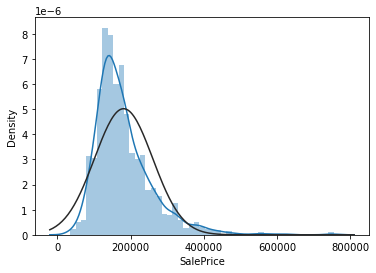

In [59]:
#sns.distplot(y,fit=norm)

In [60]:
y.skew(), y.kurtosis()

(1.8828757597682129, 6.536281860064529)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

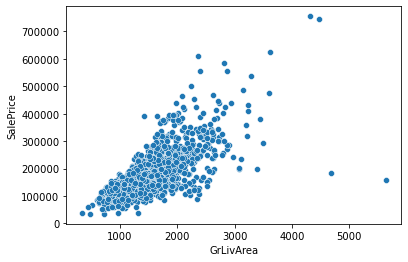

In [61]:
#sns.scatterplot(train['GrLivArea'],y)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

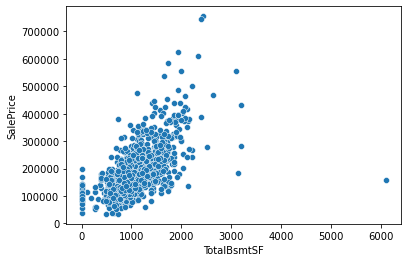

In [62]:
#sns.scatterplot(train['TotalBsmtSF'],y)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

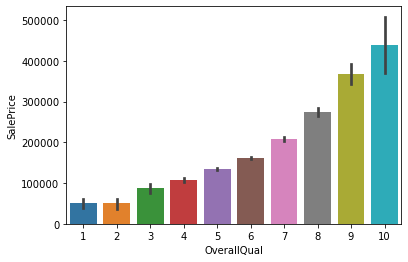

In [63]:
#sns.barplot(train['OverallQual'],y)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

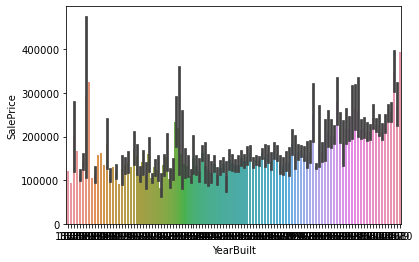

In [64]:
#sns.barplot(train['YearBuilt'],y)

<AxesSubplot:>

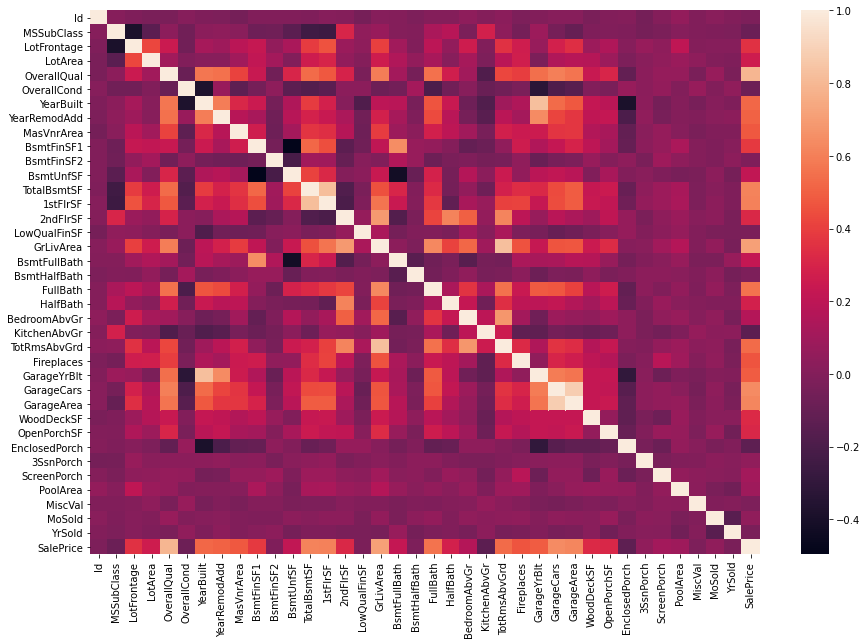

In [65]:
plt.figure(figsize=(15,10))
#sns.heatmap(train.corr())

<AxesSubplot:>

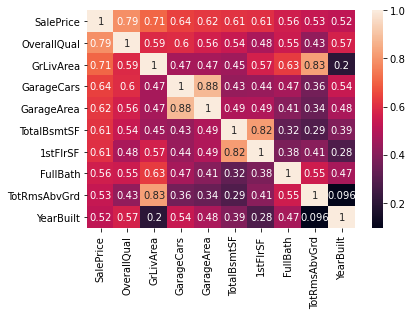

In [66]:
corr_top10_feats = abs(train.corr()['SalePrice']).sort_values(ascending=False).head(10).index
#sns.heatmap(train[corr_top10_feats].corr(),annot=True)

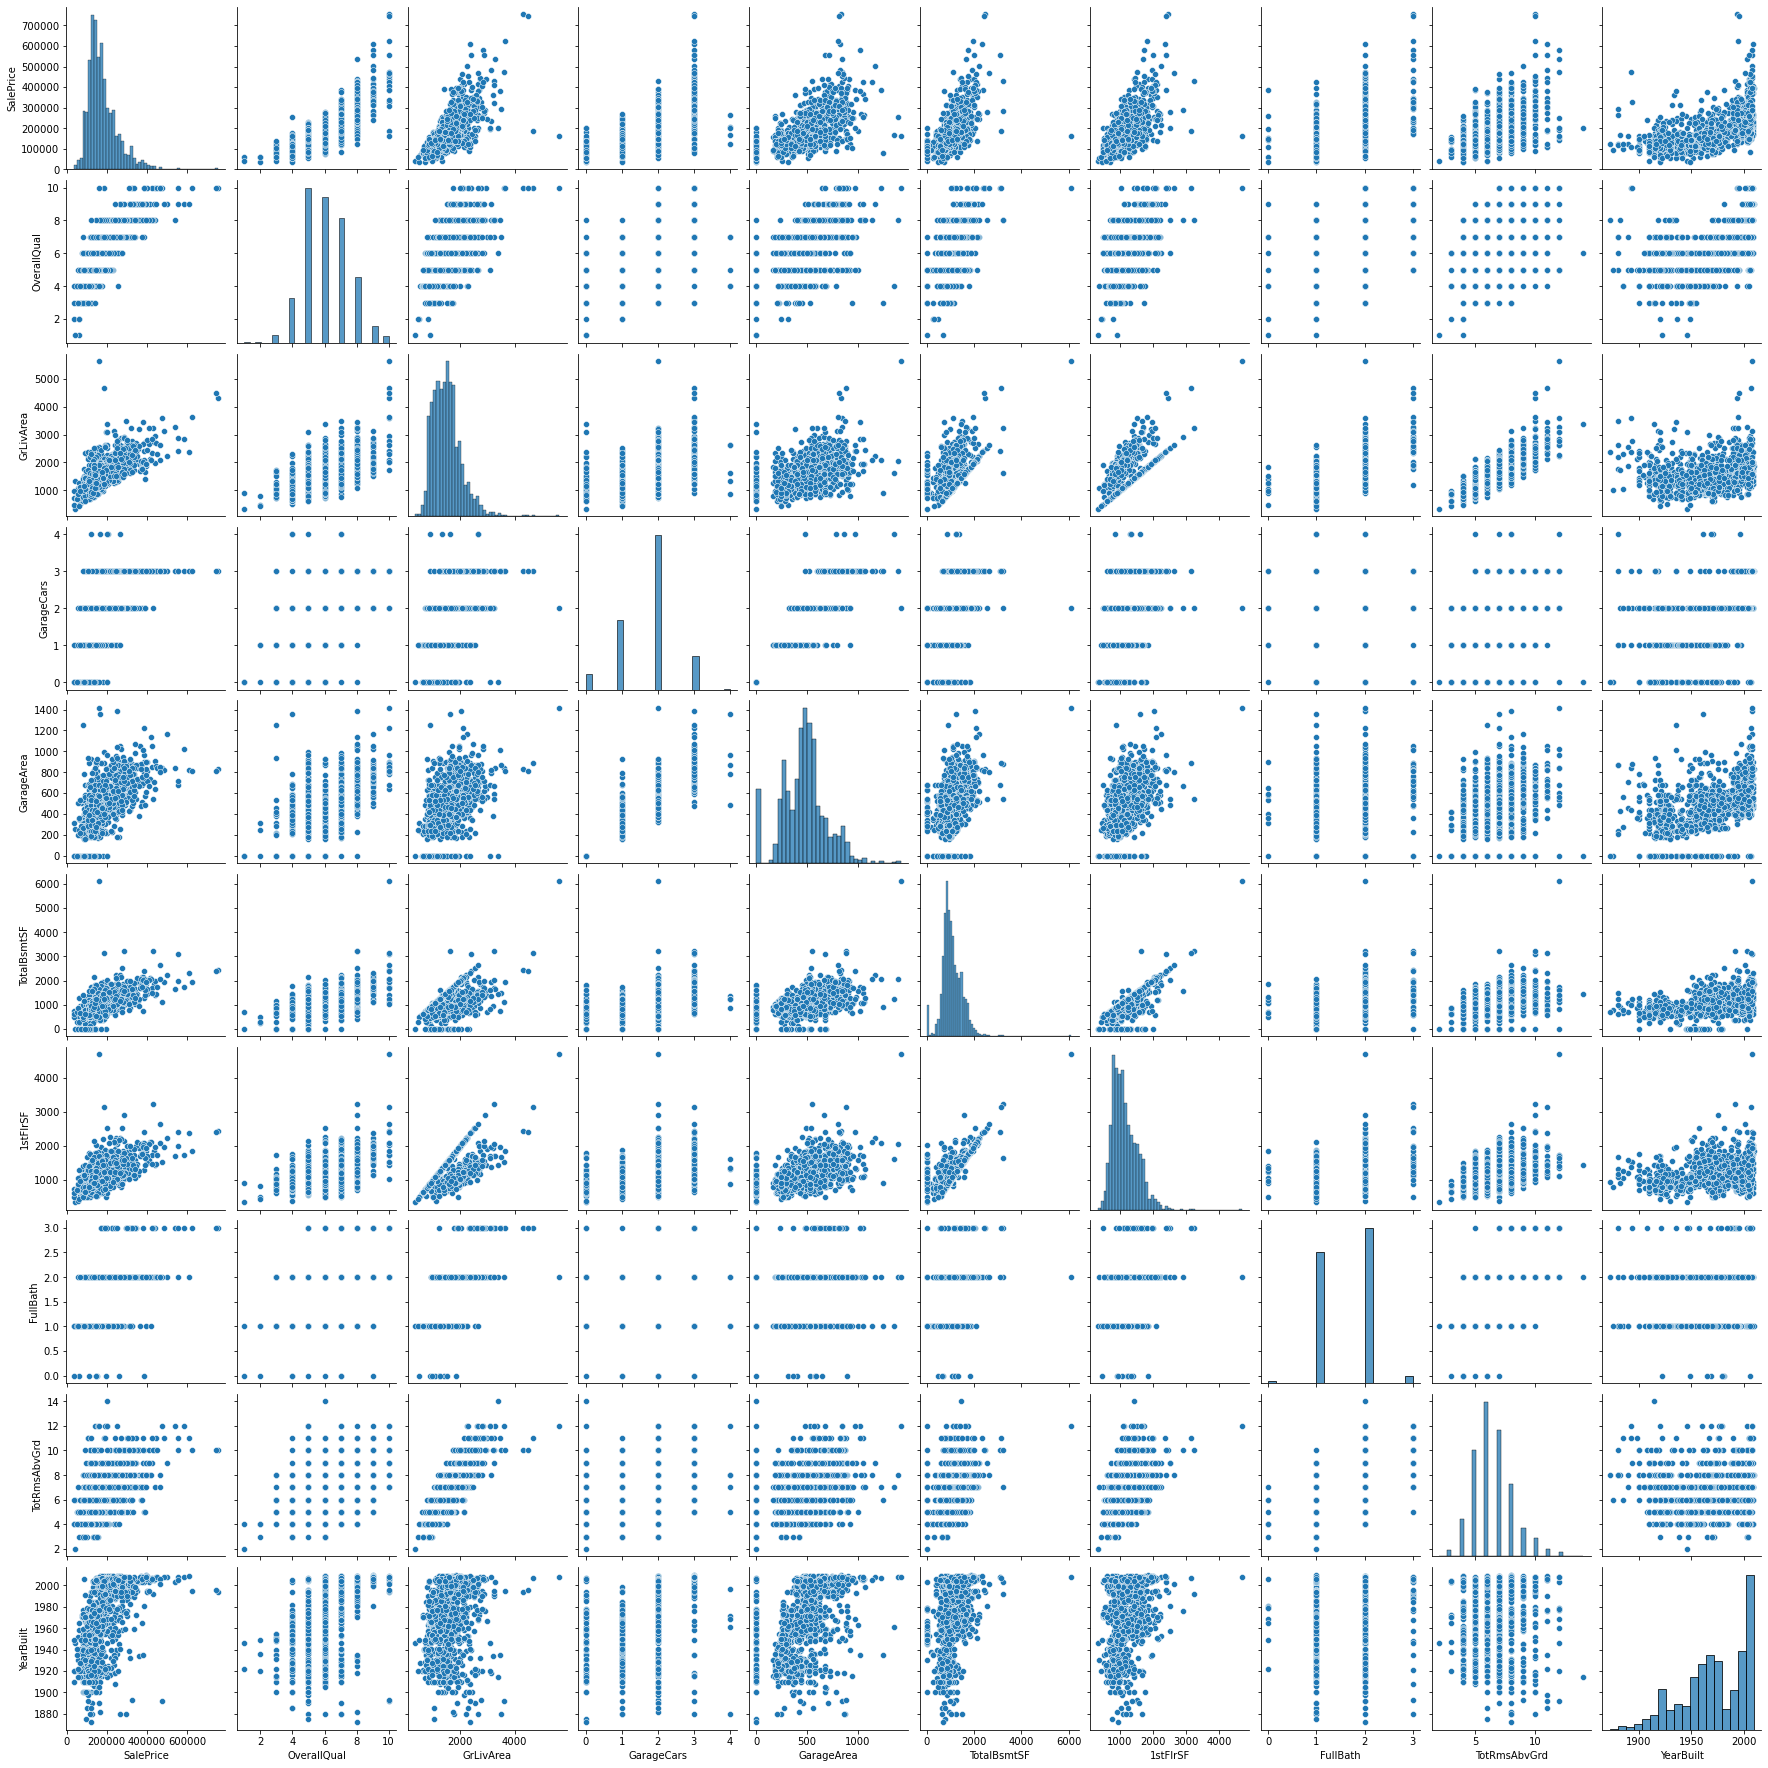

In [67]:
#sns.pairplot(train[corr_top10_feats])

In [68]:
missing_count = train.isnull().sum()
missing_count = missing_count[missing_count > 0]
missing_percent = missing_count / len(train) * 100
missing_info = pd.concat([missing_count,missing_percent],axis=1,keys=['Count','Percent']).sort_values(by='Percent',ascending=False)

In [69]:
train.shape

(1460, 81)

In [70]:
train[train['Electrical'].isnull()].index

Int64Index([1379], dtype='int64')

In [71]:
train.drop(missing_info[missing_info['Count'] > 1].index,axis=1,inplace=True)
train.drop(train[train['Electrical'].isnull()].index,inplace=True)

In [73]:
train.shape, train.isnull().sum().sum()

((1459, 63), 0)

In [76]:
train.drop(train[train['GrLivArea'] > 4500].index,inplace=True)

In [77]:
train.shape

(1457, 63)

In [78]:
train['SalePrice'] = np.log(train['SalePrice'])

In [80]:
train['GrLivArea'] = np.log(train['GrLivArea'])

In [81]:
train['HasBsmt'] = 0
train.loc[ train['TotalBsmtSF'] != 0,'HasBsmt'] = 1

In [82]:
train.loc[ train['HasBsmt'] == 1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

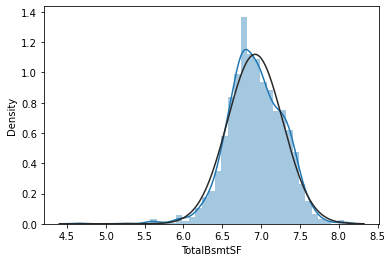

In [85]:
#sns.distplot( train.loc[train['HasBsmt']==1,'TotalBsmtSF'] ,fit=norm)

In [86]:
train.shape

(1457, 64)

In [87]:
train = pd.get_dummies(train)
train.shape

(1457, 222)